In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

patient_data = pd.DataFrame()
patient_data = pd.read_csv('./No-show-Issue-Comma-300k 2.csv')

patient_data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


While on [Kaggle](https://www.kaggle.com), I came across a patient appointment data set ([here]( (https://www.kaggle.com/joniarroba/noshowappointments)). It has over 300,000 patients as well as information about the appointment date and several binary health indicators about each patient. It posed a question, "Why do 30% of patients miss their appointments?"


And that was it. There was no additional context about where this data came from or if the health indicators were from the doctor's records or self reported. There was no description about even what country this data was from. Furthermore, there were clear typos in the column headings such as "Alcoolism" and "HiperTension" but nonetheless,I got curious about this dataset of over 300,000 people - why do **30%** of patients **miss** their appointments? 

I intended to find out. 

After all, missed doctor appointments are a huge deal in the US. It is estimated by Healthcare industry professionals that missed appointments cost the US over \$150 billion  per year or between \$100 and \$1000 per patient depending on location and specialty of the practice ([source 1](http://www.healthcarefinancenews.com/blog/insight-tackling-healthcares-costly-problem-missed-appointments), [source 2](https://www.everseat.com/blog/missed-appointments-affect-more-than-just-revenue/)). These estimates are in revenue and are not including the extra cost of staff trying to track down these patients for future appointments. 

Hospital systems recognize this huge attrition problem and are trying to get to the bottom of why patients are missing appointments. When asked, patients say that they simply forget that they had an appointment ([source 3](http://bmcfampract.biomedcentral.com/articles/10.1186/1471-2296-6-47)). Therefore, hospital systems are trying to address this forgetfulness problem using various automated reminder systems, including text message reminders, similar to the SMS reminders in our dataset. But do these reminders have an impact? 

I first wanted to know more about the dataset - Who are these patients? What are their median ages? Is their overall health representative of the United States or perhaps of a different country all together?

Secondly, I wanted to know more about these missed appointments - was there a certain day that had more missed appointments? Did age matter? What, if any, trends could I find relating to these missed appointments. 

Thirdly, what was the impact of these text message reminders? Unfortunately, we do not have any context regarding these text messages, such as what the text messages said or when they were sent in relation to a patient's appointment date. That being said, did simply receiving a text message affect the rate of showing up to an appointment?

So to summarize:

1. Who are the patients in this data set?
2. What factors contributed to missing an appointment? (fix questions to make more specific and focus on the characteristics that we do have) i.e Did Age or Days of the week affect missed appointments? 
3. Did receiving a text message affect a patient's ability to show up?


# Who Are the Patients?

the average age is 37 years
the standard deviation is 22.809014151649986 years


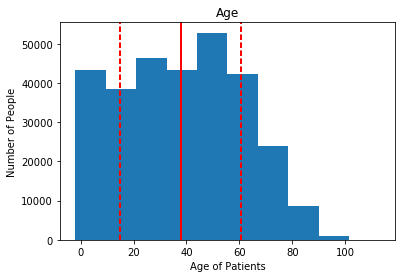

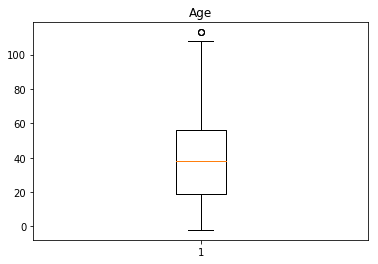

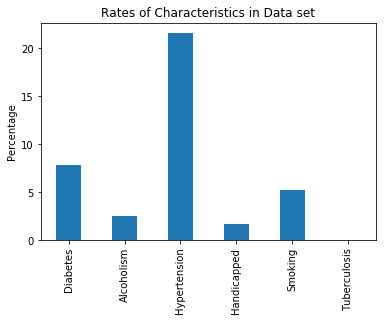

In [48]:
patient_age = patient_data['Age']
print("the average age is " + str(int(patient_age.mean()))+" years")
print("the standard deviation is "+ str(patient_age.std())+ " years")
plt.hist(patient_age)
plt.xlabel('Age of Patients')
plt.ylabel('Number of People')
plt.title('Age')
plt.axvline(patient_age.mean(), color='r', linestyle='solid', linewidth=2)
plt.axvline(patient_age.mean() + patient_age.std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(patient_age.mean() - patient_age.std(), color='r', linestyle='dashed', linewidth=2)
plt.show()

plt.boxplot(patient_age)
plt.title('Age')
plt.show()


diabetic_patients = patient_data[patient_data['Diabetes']==1]
diabetes_rate_intermediate = diabetic_patients.count()/patient_data.count()*100
diabetes_rate = float(diabetes_rate_intermediate['Diabetes'])

alcoholic_patients = patient_data[patient_data['Alcoolism']==1]
alcoholic_rate_intermediate = alcoholic_patients.count()/patient_data.count()*100
alcoholic_rate = float(alcoholic_rate_intermediate['Alcoolism'])

hypertension_patients = patient_data[patient_data['HiperTension']==1]
hypertension_rate_intermediate = hypertension_patients.count()/patient_data.count()*100
hypertension_rate = float(hypertension_rate_intermediate['HiperTension'])

handicap_patients = patient_data[patient_data['Handcap']==1]
handicap_rate_intermediate = handicap_patients.count()/patient_data.count()*100
handicap_rate = float(handicap_rate_intermediate['Handcap'])

smoke_patients = patient_data[patient_data['Smokes']==1]
smoke_rate_intermediate = smoke_patients.count()/patient_data.count()*100
smoke_rate = float(smoke_rate_intermediate['Smokes'])

tuber_patients = patient_data[patient_data['Tuberculosis']==1]
tuber_rate_intermediate = tuber_patients.count()/patient_data.count()*100
tuber_rate = float(tuber_rate_intermediate['Tuberculosis'])

##maybe use count and then put on a bar chart of the different rates with a different rates of different countries
##using world bank data.....Might need beautiful soup but will come back to this because over the top touch
#there is a for loop here but not sure what items in line would be for items (just want column name) 

patient_rates = (diabete_test, alcoholism_test, hypertension_rate, handicap_rate, smoke_rate, tuber_rate)
bar_range = np.arange(6)

plt.bar(bar_range, patient_rates, 0.45)
plt.xticks(bar_range, ('Diabetes', 'Alcoholism', 'Hypertension','Handicapped', 'Smoking', 'Tuberculosis'), rotation= 'vertical')
plt.ylabel('Percentage')
plt.title('Rates of Characteristics in Data set')
plt.show()




description of the above saying what I found and why it is important (does it allign with American rates ....grab american rates of x and y).


# Trends on Missed Appointments


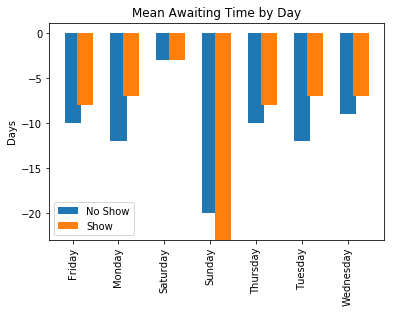

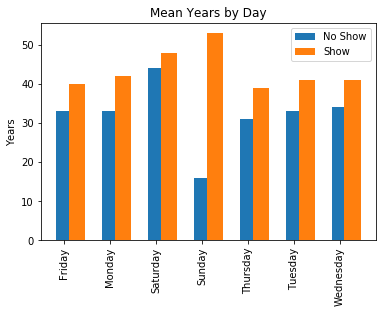

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
counts for each day
DayOfTheWeek
Friday       36525
Monday       40245
Saturday       880
Sunday           5
Thursday     42412
Tuesday      44626
Wednesday    44576
Name: Age, dtype: int64
 
DayOfTheWeek
Friday       16246
Monday       19053
Saturday       513
Sunday           1
Thursday     17850
Tuesday      18149
Wednesday    18919
Name: Age, dtype: int64


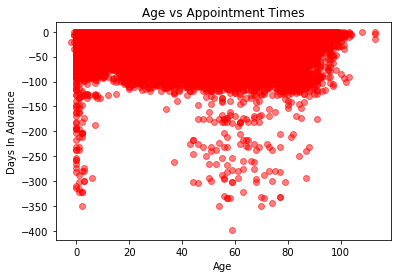

In [129]:
patient_no_show = patient_data[patient_data['Status']=="No-Show"]
patient_show = patient_data[patient_data['Status']=="Show-Up"]


day_split_show = patient_show.groupby('DayOfTheWeek').median()
day_split_no_show = patient_no_show.groupby('DayOfTheWeek').median()

day_bar = np.arange(7)
plt.bar(day_bar, day_split_no_show['AwaitingTime'], 0.35, label='No Show') ##take Absolute value!?
plt.bar(day_bar+0.28, day_split_show['AwaitingTime'],0.35, label = 'Show')
plt.xticks(day_bar,('Friday', 'Monday', 'Saturday','Sunday', 'Thursday', 'Tuesday', 'Wednesday'), rotation= 'vertical')
plt.ylabel('Days')
plt.title('Median Scheduled Days in Advance')
plt.legend()
plt.show()


day_bar = np.arange(7)
plt.bar(day_bar, day_split_no_show['Age'], 0.35, label='No Show')
plt.bar(day_bar+0.28, day_split_show['Age'],0.35, label = 'Show') ##prob need to do .sort
plt.xticks(day_bar,('Friday', 'Monday', 'Saturday','Sunday', 'Thursday', 'Tuesday', 'Wednesday'), rotation= 'vertical')
plt.ylabel('Years')
plt.title('Median Years by Day')
plt.legend()
plt.show()
##LOOK AT IF AWAITING TIME MATTERED WITH DAYS OF THE WEEK in terms of showing up. and if age mattered.  

## then when looking at sunday, we are seeing some extreme numbers. want to print number of people in Sunday ...show not valid
show_day_counts=patient_show.groupby('DayOfTheWeek').count()
no_show_day_counts=patient_no_show.groupby('DayOfTheWeek').count()

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("counts for each day")
print(show_day_counts['Age'])
print(" ")
print(no_show_day_counts['Age'])

##print(day_split_show) ## should probably figure out how to get days of the week in order? 
##print(day_split_no_show)

plt.scatter(x=patient_data['Age'], y=patient_data['AwaitingTime'], color='red', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Days In Advance')
plt.title('Age vs Appointment Times')
plt.show()

description of stat above


Talk about mean awaiting time, show vs no show  (as expected, those with longer plans in advance, tend to miss their time

talk about those older, tend to make their appointments more. 

regardless of age, people tend to make appointments within 100 days (dont need to have show vs no show on the scatter plot? why i commented it out). scatter plot should come after bar graphs ....need to change title of bar graph

additional questions to explore would be causes for why drives people to schedule farther in advance.

scatter plot shows that there is an interest of age, years and wanted

talk about discarding the Sunday (data wrangling)

# SMS Reminder Effects

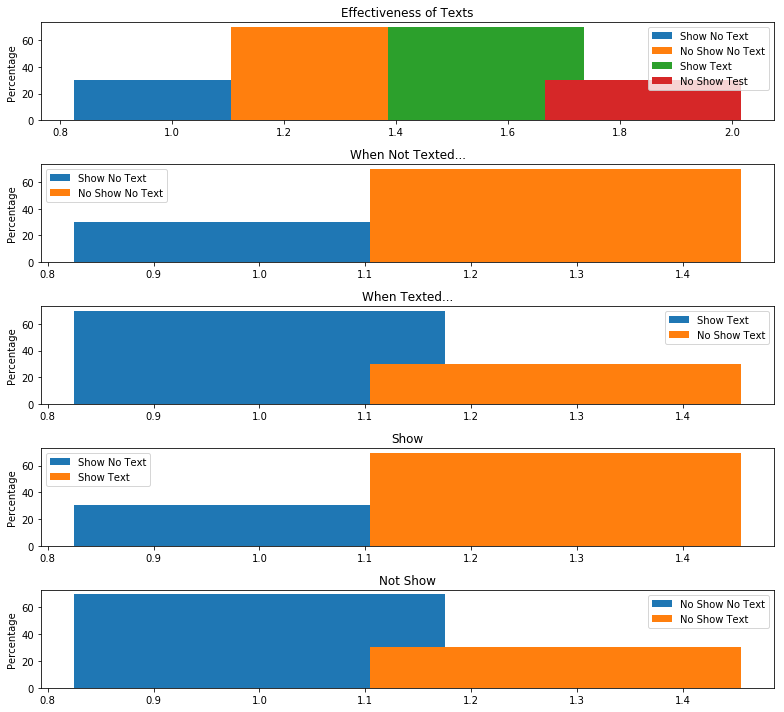

In [125]:
patient_no_text = patient_data[patient_data['Sms_Reminder']==0]
patient_text = patient_data[patient_data['Sms_Reminder']==1]
showed_patient_no_text = patient_no_text[patient_no_text['Status']=='No-Show']
showed_patient_no_text_rate= (showed_patient_no_text['Age'].count()/patient_no_text['Age'].count())*100

no_show_patient_no_text = patient_no_text[patient_no_text['Status']=='Show-Up']
no_show_patient_no_text_rate=(no_show_patient_no_text['Age'].count()/patient_no_text['Age'].count())*100


no_showed_patient_text = patient_text[patient_text['Status']=='No-Show']
no_showed_patient_text_rate=(no_showed_patient_text['Age'].count()/patient_text['Age'].count())*100

showed_patient_text = patient_text[patient_text['Status']=='Show-Up']
showed_patient_text_rate=(showed_patient_text['Age'].count()/patient_text['Age'].count())*100

##HOW CAN I HIDE THE X AXIS UNITS? 
plt.figure(figsize=(11,10))
plt.subplot(5,1,1)
plt.bar(1, showed_patient_no_text_rate, 0.35, label='Show No Text')
plt.bar(1+0.28, no_show_patient_no_text_rate,0.35, label = 'No Show No Text')
plt.bar(1+(0.28*2), showed_patient_text_rate,0.35, label = 'Show Text')
plt.bar(1+(0.28*3), no_showed_patient_text_rate,0.35, label = 'No Show Test')
plt.ylabel('Percentage')
plt.title('Effectiveness of Texts')
plt.legend()


plt.subplot(5,1,2)
plt.bar(1, showed_patient_no_text_rate, 0.35, label='Show No Text')
plt.bar(1+0.28, no_show_patient_no_text_rate,0.35, label = 'No Show No Text')
plt.ylabel('Percentage')
plt.title('When Not Texted...')
plt.legend()

plt.subplot(5,1,3)
plt.bar(1, showed_patient_text_rate,0.35, label = 'Show Text')
plt.bar(1+0.28, no_showed_patient_text_rate,0.35, label = 'No Show Text')
plt.ylabel('Percentage')
plt.title('When Texted...')
plt.legend()

plt.subplot(5,1,4)
plt.bar(1, showed_patient_no_text_rate, 0.35, label='Show No Text')
plt.bar(1+0.28, showed_patient_text_rate,0.35, label = 'Show Text')
plt.ylabel('Percentage')
plt.title('Show')
plt.legend()

plt.subplot(5,1,5)
plt.bar(1, no_show_patient_no_text_rate,0.35, label = 'No Show No Text')
plt.bar(1+0.28, no_showed_patient_text_rate,0.35, label = 'No Show Text')
plt.ylabel('Percentage')
plt.title('Not Show')
plt.legend()

plt.tight_layout()
plt.show()
